In [1]:
# Dependencies
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import warnings
warnings.filterwarnings('ignore')

Wind patterns to have an idea of where the whales corpses go

In [2]:
# Path to load the wind file
path_wind = 'data/CERSAT-GLO-BLENDED_WIND_L4_REP-V6-OBS_FULL_TIME_SERIE_1662843152101.nc'

# Product Variable
wind = xr.open_dataset(path_wind)

In [3]:
wind

<xarray.Dataset>
Dimensions:         (time: 124, lat: 21, lon: 29)
Coordinates:
  * lon             (lon) float32 -79.0 -78.75 -78.5 ... -72.5 -72.25 -72.0
  * time            (time) datetime64[ns] 2015-03-01 ... 2015-03-31T18:00:00
  * lat             (lat) float32 -49.0 -48.75 -48.5 ... -44.5 -44.25 -44.0
Data variables:
    northward_wind  (time, lat, lon) float64 ...
    wind_speed      (time, lat, lon) float64 ...
    eastward_wind   (time, lat, lon) float64 ...
Attributes: (12/72)
    Conventions:                                    CF-1.7, ACDD-1.3, ISO 8601
    FROM_ORIGINAL_FILE__netcdf_version_id:          4.6.1 of Sep  8 2018 17:2...
    date_created:                                   2020-12-03T15:00:13
    date_modified:                                  2020-12-03T15:00:13
    id:                                             WIND_GLO_WIND_L4_REP_OBSE...
    naming_authority:                               fr.ifremer.cersat
    ...                                             ...
    publisher_institution:                          CMEMS
    scientific_support_contact:                     Abderrahim.Bentamy@ifreme...
    source_data:                                     
    technical_support_contact:                      cersat@ifremer.fr
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...
    comment:

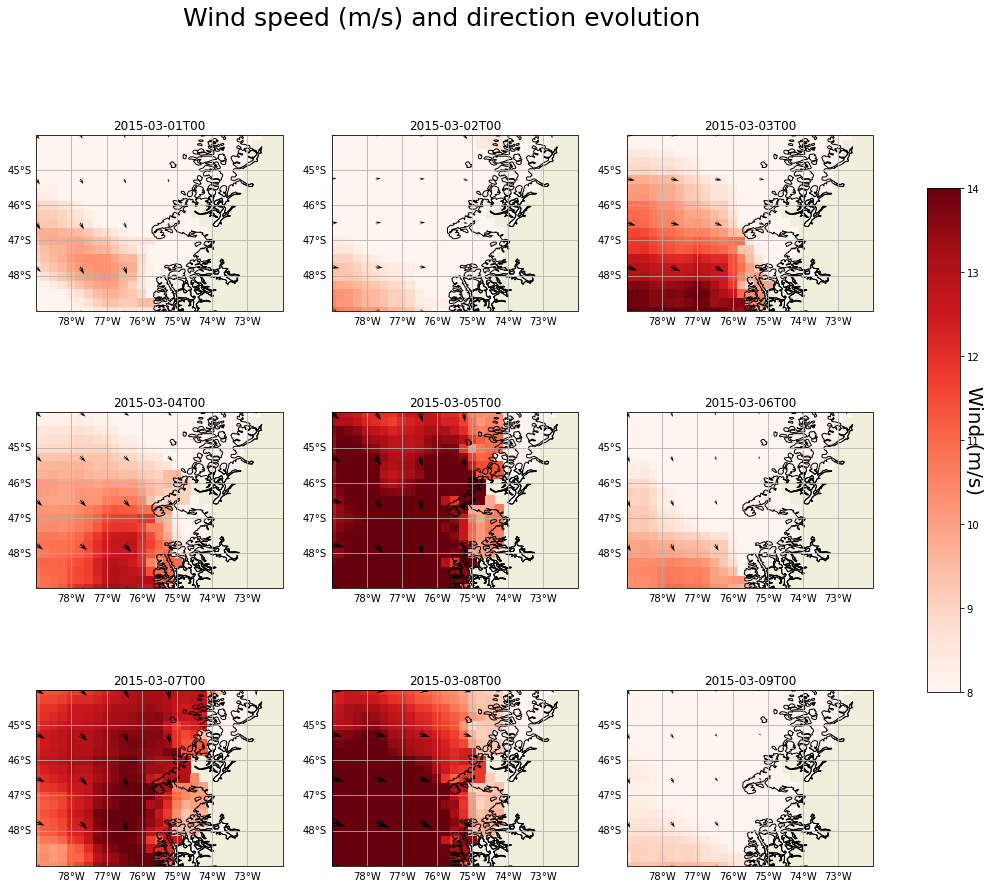

In [4]:
# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 14))                                                   # create a figure and define its size
f.subplots_adjust(right = 0.9, bottom = 0.1, hspace= 0.2,wspace=0.2)               # adjust the space between subplots
axs = []
for i in range(9) :
    ax = f.add_subplot(3,3,i+1,projection=ccrs.PlateCarree())                      # the figure will be composed of 3x3 maps
    ax.coastlines()                                                                # add the coastlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                    # add the longitude / latitude lines
    gl.right_labels = False                                                        # remove latitude labels on the right
    gl.top_labels = False                                                          # remove longitude labels on the top
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                         # add land mask
    ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                          # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
    axs.append(ax)

# Define the dates and plot the wind maps
start_date = np.datetime64('2015-03-01')
step_arrows = 5
for i in range(9):
    date = start_date + i
    # add the wind speed in the background : change vmin / vmax to set the colorbar values and cmap to change the color palette
    im = axs[i].pcolor(wind['lon'].data, wind['lat'].data,wind['wind_speed'].sel(time=date).squeeze(),vmin=8,vmax=14,cmap='Reds')
    # add the wind direction arrows : step_arrows reduces the number of vectors plotted
    vect = axs[i].quiver(wind['lon'].data[::step_arrows],wind['lat'].data[::step_arrows],
                         wind['eastward_wind'].sel(time=date).squeeze().data[::step_arrows,::step_arrows],
                         wind['northward_wind'].sel(time=date).squeeze().data[::step_arrows,::step_arrows],
                         headlength=8,headwidth=5,scale=300)
    # add the date in the map titles 
    axs[i].set_title(np.datetime_as_string(date,unit='h'))
    

# Add the titles and legend
f.suptitle('Wind speed (m/s) and direction evolution',fontsize=25)                 # add a title to the figure
cbar_ax = f.add_axes([0.95, 0.3, 0.03, 0.5])                                       # define the colorbar location
cbar =f.colorbar(im,cax=cbar_ax)                                                   # display the colorbar
cbar.set_label('Wind (m/s)', rotation=270,fontsize=20)                             # add the title of the colorbar

# Save figure
plt.savefig('images/wind/wind_evolution_penas_march2105-1.png')

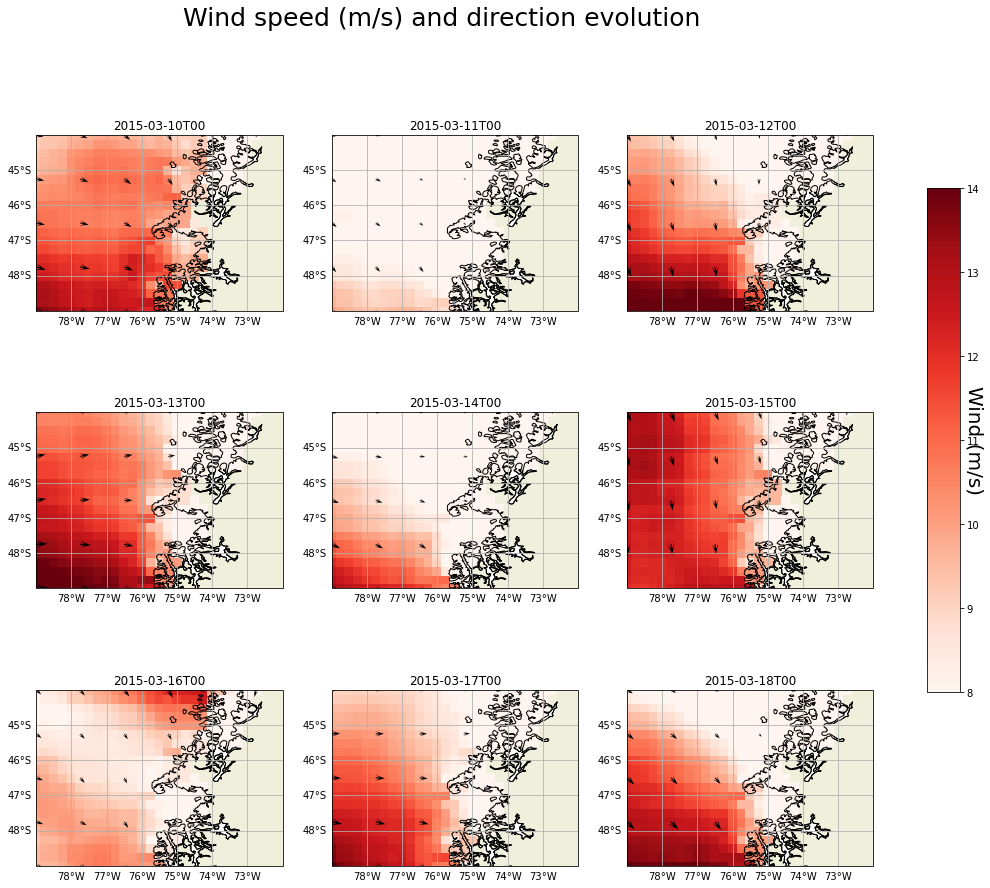

In [6]:
# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 14))                                                   # create a figure and define its size
f.subplots_adjust(right = 0.9, bottom = 0.1, hspace= 0.2,wspace=0.2)               # adjust the space between subplots
axs = []
for i in range(9) :
    ax = f.add_subplot(3,3,i+1,projection=ccrs.PlateCarree())                      # the figure will be composed of 3x3 maps
    ax.coastlines()                                                                # add the coastlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                    # add the longitude / latitude lines
    gl.right_labels = False                                                        # remove latitude labels on the right
    gl.top_labels = False                                                          # remove longitude labels on the top
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                         # add land mask
    ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                          # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
    axs.append(ax)

# Define the dates and plot the wind maps
start_date = np.datetime64('2015-03-10')
step_arrows = 5
for i in range(9):
    date = start_date + i
    # add the wind speed in the background : change vmin / vmax to set the colorbar values and cmap to change the color palette
    im = axs[i].pcolor(wind['lon'].data, wind['lat'].data,wind['wind_speed'].sel(time=date).squeeze(),vmin=8,vmax=14,cmap='Reds')
    # add the wind direction arrows : step_arrows reduces the number of vectors plotted
    vect = axs[i].quiver(wind['lon'].data[::step_arrows],wind['lat'].data[::step_arrows],
                         wind['eastward_wind'].sel(time=date).squeeze().data[::step_arrows,::step_arrows],
                         wind['northward_wind'].sel(time=date).squeeze().data[::step_arrows,::step_arrows],
                         headlength=8,headwidth=5,scale=300)
    # add the date in the map titles 
    axs[i].set_title(np.datetime_as_string(date,unit='h'))
    

# Add the titles and legend
f.suptitle('Wind speed (m/s) and direction evolution',fontsize=25)                 # add a title to the figure
cbar_ax = f.add_axes([0.95, 0.3, 0.03, 0.5])                                       # define the colorbar location
cbar =f.colorbar(im,cax=cbar_ax)                                                   # display the colorbar
cbar.set_label('Wind (m/s)', rotation=270,fontsize=20)                             # add the title of the colorbar

# Save figure
plt.savefig('images/wind/wind_evolution_penas_march2105-2.png')

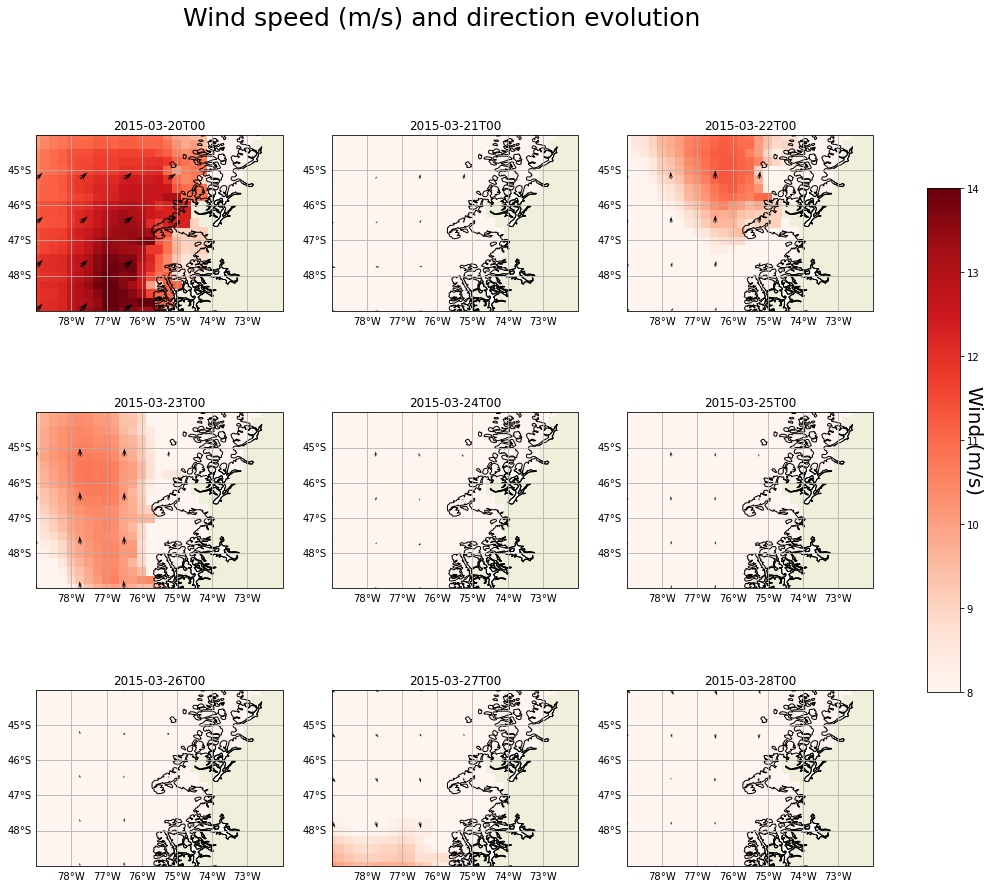

In [7]:
# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 14))                                                   # create a figure and define its size
f.subplots_adjust(right = 0.9, bottom = 0.1, hspace= 0.2,wspace=0.2)               # adjust the space between subplots
axs = []
for i in range(9) :
    ax = f.add_subplot(3,3,i+1,projection=ccrs.PlateCarree())                      # the figure will be composed of 3x3 maps
    ax.coastlines()                                                                # add the coastlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                    # add the longitude / latitude lines
    gl.right_labels = False                                                        # remove latitude labels on the right
    gl.top_labels = False                                                          # remove longitude labels on the top
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                         # add land mask
    ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                          # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
    axs.append(ax)

# Define the dates and plot the wind maps
start_date = np.datetime64('2015-03-20')
step_arrows = 5
for i in range(9):
    date = start_date + i
    # add the wind speed in the background : change vmin / vmax to set the colorbar values and cmap to change the color palette
    im = axs[i].pcolor(wind['lon'].data, wind['lat'].data,wind['wind_speed'].sel(time=date).squeeze(),vmin=8,vmax=14,cmap='Reds')
    # add the wind direction arrows : step_arrows reduces the number of vectors plotted
    vect = axs[i].quiver(wind['lon'].data[::step_arrows],wind['lat'].data[::step_arrows],
                         wind['eastward_wind'].sel(time=date).squeeze().data[::step_arrows,::step_arrows],
                         wind['northward_wind'].sel(time=date).squeeze().data[::step_arrows,::step_arrows],
                         headlength=8,headwidth=5,scale=300)
    # add the date in the map titles 
    axs[i].set_title(np.datetime_as_string(date,unit='h'))
    

# Add the titles and legend
f.suptitle('Wind speed (m/s) and direction evolution',fontsize=25)                 # add a title to the figure
cbar_ax = f.add_axes([0.95, 0.3, 0.03, 0.5])                                       # define the colorbar location
cbar =f.colorbar(im,cax=cbar_ax)                                                   # display the colorbar
cbar.set_label('Wind (m/s)', rotation=270,fontsize=20)                             # add the title of the colorbar

# Save figure
plt.savefig('images/wind/wind_evolution_penas_march2105-3.png')